#índice:

Criei um índice para se atrelar aos difentes tópicos desse documento,
pois é uma boa forma de auxiliar a leitura de arquivos grandes e etc.

<a name="Contents"></a>
1. [Importando bibliotecas](#import)
2. [Construindo um dataframe](#read)
3. [Identificando dados ausentes/missing](#identificando)
4. [Tratando dados ausentes/missing](#tratando)
5. [Dados duplicados](#duplicados)
6. [Método map (mapeamento)](#map)

#1. Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(5,4)*100,
                  index = ["A", "B", "C", "D", "E"],
                  columns = ["col1", "col2", "col3", "col4"])

df
df_nan = df

In [ ]:
df.dtypes

col1    float64
col2    float64
col3    float64
col4    float64
dtype: object

In [ ]:
# Alterando o tipo dos dados:

df["col2"] = df["col2"].astype(int)
df["col4"] = df["col4"].astype(int)

In [ ]:
df_nan

,col1,col2,col3,col4
A,81.452199,99,24.033946,76
B,-83.455181,11,105.762041,25
C,-0.249558,6,111.307842,-87
D,89.580623,146,-134.635125,-43
E,-58.472408,10,-18.530548,-83


In [ ]:
df.dtypes

col1    float64
col2      int64
col3    float64
col4      int64
dtype: object

In [ ]:
# Fazendo com que o valor dessa linha que antes era um número
# seja agora um NaN.
df_nan.iloc[4-1, 2-1] = np.nan

In [ ]:
df_nan

,col1,col2,col3,col4
A,81.452199,99.0,24.033946,76
B,-83.455181,11.0,105.762041,25
C,-0.249558,6.0,111.307842,-87
D,89.580623,NaN,-134.635125,-43
E,-58.472408,10.0,-18.530548,-83


# 3. Identificando dados faltantes

In [ ]:
# Para identificar os dados faltantes há dois métodos:
# o isna() e o isnull(), que funcionam da mesma forma
# em seu resultado, vejamos:

# Como pode-se ver, ele retorna valores False para as linhas
# que apresentam algum dado que não seja NaN, assim como o isnull() faz.

df.isna()

,col1,col2,col3,col4
A,False,False,False,False
B,False,False,False,False
C,False,False,False,False
D,False,True,False,False
E,False,False,False,False


In [ ]:
df.isnull()

,col1,col2,col3,col4
A,False,False,False,False
B,False,False,False,False
C,False,False,False,False
D,False,True,False,False
E,False,False,False,False


In [ ]:
# Para saber a quantidade de valores que são False
# e True em cada coluna:

df.isna().value_counts()

col1   col2   col3   col4 
False  False  False  False    4
       True   False  False    1
dtype: int64

In [ ]:
df.iloc[5-1, 3-1] = np.nan
df.iloc[2-1, 1-1] = np.nan

In [ ]:
df

,col1,col2,col3,col4
A,81.452199,99.0,24.033946,76
B,NaN,11.0,105.762041,25
C,-0.249558,6.0,111.307842,-87
D,89.580623,NaN,-134.635125,-43
E,-58.472408,10.0,NaN,-83


In [ ]:
# Para contar o total de dados NaN:

df.isnull().sum().sum()

3

In [ ]:
# Retornando na forma de dataframe
# apenas linha que possui, na coluna 1,
# o valor NaN.

df[df.col1.isna()]


,col1,col2,col3,col4
B,NaN,11.0,105.762041,25


In [ ]:
# Caso eu queira retornar todos os valores
# da coluna 1 que não são NaN em dataframe.
# O "~" é o que me permite fazer isso.

df[~df.col1.isna()]


,col1,col2,col3,col4
A,81.452199,99.0,24.033946,76
C,-0.249558,6.0,111.307842,-87
D,89.580623,NaN,-134.635125,-43
E,-58.472408,10.0,NaN,-83


# Substituindo os valores do dataframe:

In [ ]:
# Podemos preencher os valores que são NaN de um dataframe
# por meio da método fillna(), no qual como parâmetro, entre parênteses,
# podemos passar qualquer valor desejado, como zero por exemplo, vejamos:
df


,col1,col2,col3,col4
A,81.452199,99.0,24.033946,76
B,NaN,11.0,105.762041,25
C,-0.249558,6.0,111.307842,-87
D,89.580623,NaN,-134.635125,-43
E,-58.472408,10.0,NaN,-83


In [ ]:
df.fillna(0)

,col1,col2,col3,col4
A,81.452199,99.0,24.033946,76
B,0.000000,11.0,105.762041,25
C,-0.249558,6.0,111.307842,-87
D,89.580623,0.0,-134.635125,-43
E,-58.472408,10.0,0.000000,-83


Excluindo os dados faltantes (NaN):

In [ ]:
# Podemos fazer isso utilizando o dropna(), como:

In [ ]:
df_nan

,col1,col2,col3,col4
A,81.452199,99.0,24.033946,76
B,NaN,11.0,105.762041,25
C,-0.249558,6.0,111.307842,-87
D,89.580623,NaN,-134.635125,-43
E,-58.472408,10.0,NaN,-83


In [ ]:
df_nan.dropna()

,col1,col2,col3,col4
A,81.452199,99.0,24.033946,76
C,-0.249558,6.0,111.307842,-87


# Mapeamento:

Utilizamos o mapeamento quando desejamos mapear os valores dos dados, bem como substituí-los de uma forma mais automatizada, por assim dizer, como:

In [ ]:
# 1 -> Feminino
# 0 -> masculino

genero = pd.Series([1,0,1,0,1,0,0,0,1,0,0,1])
genero


0     1
1     0
2     1
3     0
4     1
5     0
6     0
7     0
8     1
9     0
10    0
11    1
dtype: int64

In [ ]:
# Agora, se eu quero substituir o 1 para masculino e o 0 para feminino, basta
# eu utilizar o método map, vejamos:

genero_2 = genero.map({1: "masculino", 0: "feminino"})
genero_2

0     masculino
1      feminino
2     masculino
3      feminino
4     masculino
5      feminino
6      feminino
7      feminino
8     masculino
9      feminino
10     feminino
11    masculino
dtype: object

# Renomeando colunas e índices:

In [ ]:
# Podemos renomear colunas e índices da seguinte forma:

df.columns

Index(['col1', 'col2', 'col3', 'col4'], dtype='object')

In [ ]:
df.columns = ["coluna_1", "coluna_2", "coluna_3", "coluna_4"]
df

,coluna_1,coluna_2,coluna_3,coluna_4
A,81.452199,99.0,24.033946,76
B,NaN,11.0,105.762041,25
C,-0.249558,6.0,111.307842,-87
D,89.580623,NaN,-134.635125,-43
E,-58.472408,10.0,NaN,-83


In [ ]:
df.index

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')

In [ ]:
# Criando uma nova coluna no dataframe, a qual
# servirá como base para a criação do índice
df["indice"] = [0, 1, 2, 3, 4]

In [ ]:
# Para criarmos o índice, enfim, basta passarmos
# o método set_index, o qual requer um parâmetro de nome,
# como o que fizemos nesse exemplo. O método é set_index,
# porque numa tradução poderíamos pensar como um "defina o índice disso",
# uma vez que "set" pode ser usado pensando num conjunto de dados, ou numa
# ótica imperativa de "defina isso"

df = df.set_index("indice")
df

,coluna_1,coluna_2,coluna_3,coluna_4
indice,,,,
0,81.452199,99.0,24.033946,76
1,NaN,11.0,105.762041,25
2,-0.249558,6.0,111.307842,-87
3,89.580623,NaN,-134.635125,-43
4,-58.472408,10.0,NaN,-83


In [ ]:
# Se quisermos resetar os índices:

# Perceba que agora os índices foram resetados,
# de tal forma que a coluna que fizemos para se tornar
# um índice retorna em sua forma original.

df.reset_index()

,indice,coluna_1,coluna_2,coluna_3,coluna_4
0,0,81.452199,99.0,24.033946,76
1,1,NaN,11.0,105.762041,25
2,2,-0.249558,6.0,111.307842,-87
3,3,89.580623,NaN,-134.635125,-43
4,4,-58.472408,10.0,NaN,-83


In [ ]:
# Se quisermos retirar a coluna que criamos exclusivamente
# para ser o nosso índice.
df.reset_index(drop=True)

,coluna_1,coluna_2,coluna_3,coluna_4
0,81.452199,99.0,24.033946,76
1,NaN,11.0,105.762041,25
2,-0.249558,6.0,111.307842,-87
3,89.580623,NaN,-134.635125,-43
4,-58.472408,10.0,NaN,-83


# Categorização:

Processo de transformar dados numéricos em categorias, que podem ser tanto nominais quanto ordinais. Esse método nos permite agrupar os dados em determinados grupos, permitindo uma análise mais segmentada, deixando mais eficiente.

Por exemplo, podemos utilizar desse método com clientes de um banco em relação ao seu valor em caixa, separando-os conforme o montante armazenado, assim como classes sociais, times de futebol em um país e etc.

In [ ]:
df_imc = pd.DataFrame({"nome" : ["Umezu", "Chang", "Müller", "Agnes", "Akemi", "Larissa", "Manu", "Loducca"],
                       "imc" : [27, 26, 25, 16, 16.7, 17.5, 18.6, 22]})


df_imc

,nome,imc
0,Umezu,27.0
1,Chang,26.0
2,Müller,25.0
3,Agnes,16.0
4,Akemi,16.7
5,Larissa,17.5
6,Manu,18.6
7,Loducca,22.0


**Nas faixas da OMS:**



*   Muito abaixo do peso: 16 a 16.9 kg/m2
*   Abaixo do peso: 17 a 18.4 kg/m2
*   Peso normal: 18.5 a 24.9 kg/m2
*   Acima do peso: 25 a 29.9 kg/m2




In [ ]:
# Caso eu queira criar uma variável categórica, segmentando
# pessoas que apresentam faixas de peso na ótica da OMS, o que fazer?

# Criando uma variável categórica para pessoas abaixo do peso
df_imc.loc[df_imc['imc'] <= 16.9, "categorias_imc"] = "muito abaixo do peso"

# Aqui, uma vez que eu tenho um intervalo de imc, coloco as duas condições em que
# uma determinada faixa de imc apresenta, em termos qualitativos, um valor abaixo do peso
# e de peso normal, respectivamente.

df_imc.loc[(df_imc['imc'] >=17) & (df_imc['imc'] <= 18.4), "categorias_imc"] = "abaixo do peso"
df_imc.loc[(df_imc['imc'] >=18.5) & (df_imc['imc'] <= 24.9), "categorias_imc"] = "peso normal"

# Criando uma variável categórica para pessoas acima do peso
df_imc.loc[df_imc['imc'] >=25, "categorias_imc"] = "acima do peso"

In [ ]:
df_imc

,nome,imc,categorias_imc
0,Umezu,27.0,acima do peso
1,Chang,26.0,acima do peso
2,Müller,25.0,acima do peso
3,Agnes,16.0,muito abaixo do peso
4,Akemi,16.7,muito abaixo do peso
5,Larissa,17.5,abaixo do peso
6,Manu,18.6,peso normal
7,Loducca,22.0,peso normal


Podemos seperar, ainda, em saudável e não saudável:

*  Não saudável: < 18.5 kg/m²
*  Saudável: 18.5 a 24.9 kg/m²
*  Não saudável: > 25 kg/m²

Perceba que com isso eu estou cada vez mais afunilando o meu conjunto de dados, segmentando as pessoas em determinados grupos, a isso recebe o nome de reduzir o nível dos dados, que pode ser entendido como sintetizar?

In [ ]:
df_imc.loc[df_imc["imc"] < 18.5, "condicao_saude"] = "não saudável"
df_imc.loc[(df_imc["imc"] >= 18.5) & (df_imc["imc"] <= 24.9), "condicao_saude"] = "saudável"
df_imc.loc[df_imc["imc"] >= 25, "condicao_saude"] = "não saudável"


In [ ]:
df_imc

,nome,imc,categorias_imc,condicao_saude
0,Umezu,27.0,acima do peso,não saudável
1,Chang,26.0,acima do peso,não saudável
2,Müller,25.0,acima do peso,não saudável
3,Agnes,16.0,muito abaixo do peso,não saudável
4,Akemi,16.7,muito abaixo do peso,não saudável
5,Larissa,17.5,abaixo do peso,não saudável
6,Manu,18.6,peso normal,saudável
7,Loducca,22.0,peso normal,saudável


Podemos ainda segmentar os dados na ótica de quartis, para saber o nível de prevalência de mais de um tipo de dados. Os quartis são um recurso estatístico no qual nós dividimos em quatro partes iguais um conjunto de dados qualquer, resultando na formação de 25% de dados em cada quartil. Uma curiosidade é de que o quartil dois (Q2) é numericamente igual à mediana dos dados.

Para criar os quartis, então, vamos:

In [ ]:
# Estou aqui ordenando os valores do meu imc, para que assim eu possa criar
# os respectivo quartil, o qual segue uma progressão aritimética de 0.25, até chegar
# no 1. Vale notar que para gerar o quartil eu utilizo o método quantiline, como segue.
# Ainda, é possível notar que o método me retorna cada valor em relação ao seu respectivo
# quartil, como é possível notar no valor 17.30, que pertence ao primeiro quartil, o 20.3,
# que pertence ao segundo quartil e assim por diante.

df_imc["imc"].sort_values().quantile([0.25, 0.5, 0.75, 1])

0.25    17.30
0.50    20.30
0.75    25.25
1.00    27.00
Name: imc, dtype: float64

In [ ]:
# Sob posse dessa compreensão, podemos criar uma outra coluna no df_imc, que nos
# permitirá segmentar as pessoas mediante ao quartil que pertencem. Para tanto:


df_imc.loc[df_imc["imc"] <= 17.3, "quartil"] = "q1"
df_imc.loc[(df_imc["imc"] >= 17.3) & (df_imc["imc"] <= 20.3), "quartil"] = "q2"
df_imc.loc[(df_imc["imc"] >= 20.3) & (df_imc["imc"] <= 25.25), "quartil"] = "q3"
df_imc.loc[(df_imc["imc"] >= 25.25) & (df_imc["imc"] <= 27), "quartil"] = "q4"



In [ ]:
df_imc

,nome,imc,categorias_imc,condicao_saude,quartil
0,Umezu,27.0,acima do peso,não saudável,q4
1,Chang,26.0,acima do peso,não saudável,q4
2,Müller,25.0,acima do peso,não saudável,q3
3,Agnes,16.0,muito abaixo do peso,não saudável,q1
4,Akemi,16.7,muito abaixo do peso,não saudável,q1
5,Larissa,17.5,abaixo do peso,não saudável,q2
6,Manu,18.6,peso normal,saudável,q2
7,Loducca,22.0,peso normal,saudável,q3


Get Dummies: Método no qual podemos passar um dataframe, que irá gerar valores booleanos para diferenciar um dado de outro, como por exemplo:

In [ ]:
pd.get_dummies(df_imc["condicao_saude"])

,não saudável,saudável
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,0,1
7,0,1


# Amostragem:

A amostragem é um método que se consiste retirar de uma população um dado valor que consiga representá-la com uma certa evidência estatística, isto é, que consiga representar a realidade, ainda que com um intervalo de confiança que irá variar do valor encontrado um tanto para mais ou para menos. População é nome que damos ao universo completo dos dados, sendo, portanto, a amostra apenas uma parte desse.

In [ ]:
df_a = pd.DataFrame(np.random.randint(10000, size=(10000, 10)), columns=["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"])

# Para saber o formato do dataframe:
df_a.shape

(10000, 10)

In [ ]:
df_a.head()

,A,B,C,D,E,F,G,H,I,J
0,3234,7687,1287,7766,1580,4399,5452,6892,6169,9882
1,1024,7527,2569,1948,2811,8913,5753,776,4880,8629
2,4310,6859,4890,6229,8164,3143,4430,338,6633,9729
3,1059,9104,5916,3090,2002,1998,2001,2035,396,2764
4,7432,7611,1125,2363,5876,5950,3051,1423,3037,6253


In [ ]:
# Para conseguirmos criar uma amostra, utilizamos o método sample(), o qual
# como parâmetro pode ser passado um número ou fração, que terão como finalidade
# da população daquele dataframe retirar uma amostra. Vejamos:

# Gera uma amostra aleatória a cada vez que é executado.
df_a.sample(10)

,A,B,C,D,E,F,G,H,I,J
2879,1691,1961,7659,9510,7620,6999,3837,8342,5281,8530
7782,4724,4586,3705,9613,4634,2614,5223,4541,8983,4212
428,6193,9765,8363,8339,4371,8921,6484,1670,9030,6802
225,9181,1620,6057,9400,412,5697,9516,6942,334,5047
9674,530,5059,490,7908,5917,9477,4354,5479,6333,5992
2349,4999,5811,3660,1961,3273,1774,3705,2900,2108,6649
918,4045,1848,6843,8237,2998,5986,886,6038,5560,5256
7097,2778,9963,7973,6830,6757,3110,3149,5495,808,8898
5475,7782,543,1891,3492,2847,5030,6499,378,5422,5401
1302,538,8828,2540,5480,202,9734,4012,1246,698,5210


In [ ]:
# Gera uma amostra aleatória assim que é executado, mas por meio de uma fração.
df_a.sample(frac=0.1)

,A,B,C,D,E,F,G,H,I,J
7609,2094,7554,6271,9410,2387,12,2400,1210,355,9517
9417,9829,3576,1405,1370,7064,9708,3293,9395,357,902
8840,414,6516,6917,9744,4401,1811,5522,3263,8483,4452
468,4053,8269,5421,9139,8550,1456,9061,2318,9488,3712
8893,3364,6526,9732,2517,1574,9176,3595,4482,3271,1824
...,...,...,...,...,...,...,...,...,...,...
8926,805,168,830,1744,7702,3439,6188,4689,5861,2896
9171,8807,1599,3264,1087,8616,4102,2647,2413,4111,3113
2222,1292,4194,7371,703,4933,6151,9663,4861,9252,8290
1482,2786,5675,9596,7145,2332,1875,7583,2980,447,6109


In [ ]:
# Gera uma amostra aleatória a partir do primeiro momento
# que é executado, mas que, uma vez que definimos o random_state,
# nas próximas vezes que for executado os mesmos valores serão gerados,
# mantendo uma constância dos dados da amostra.
df_a.sample(10, random_state = 100)

,A,B,C,D,E,F,G,H,I,J
8018,5751,3489,4829,5316,1212,9391,7188,5928,913,6765
9225,9215,8836,9876,6945,6121,884,358,4961,550,6177
3854,4434,2782,4899,2888,1251,1583,8165,2566,9429,199
2029,2428,9427,8730,7369,8687,1172,6401,7539,2736,3289
3539,806,6309,1500,1200,8004,5105,9663,1475,7682,6631
1942,8440,9002,2608,1577,7281,7570,3689,1759,5523,5830
1250,4094,7140,7269,9182,3583,1048,9601,5997,8725,916
2817,9413,2671,3869,8103,7528,4630,4333,7035,4476,4452
4211,5719,6989,2569,153,1593,6944,6651,5292,5263,9162
477,4446,5787,2409,2410,4416,1178,9768,4360,1232,5783


# Intro sobre método String:


In [ ]:
texto = "niki lauda"

In [ ]:
# Invertendo texto de trás para frente:

texto[::-1]

'adual ikin'

In [ ]:
palindromo = "ana"

palindromo[::-1]

'ana'

In [ ]:
# Podemos querer formatar o texto para que se torne melhor. Desse modo,
# como no exemplo abaixo, caso quiséssemos deixar com apenas uma letra
# maíuscula e melhor apresentável, poderíamos fazer:

texto_2 = "caiXAs"
texto_2.capitalize()

'Caixas'

In [ ]:
# Há também:

texto_2.upper()

'CAIXAS'

In [ ]:
texto_2.lower()

'caixas'

In [ ]:
texto

'niki lauda'

In [ ]:
# Podemos também querer encontrar algo num conjunto de uma string e fazemos isso
# por meio do find, vejamos como:

texto.find("l")

# Aqui, ao dizer qual letra que gostaríamos de achar, ele nos retorna a
# posição dela na respectiva String.

5

In [ ]:
# Porém, se escrevemos uma letra que não faz parte daquele conjunto de strings,
# ele nos retornará o valor de -1, como podemos ver a seguir:

texto.find("S")


-1

In [ ]:
# Podemos querer substituir uma string ou sua parte por outra e fazemos isso
# por meio do método replace() da seguinte forma:

texto_3 = "gato porquinho"

# Veja que o replace pede que passamos o valor que será substituido, quero dizer,
# a string, por aquela que desejamos substituir.
texto_3.replace("porquinho", "canoa")

'gato canoa'

# Junção de tabelas:

Nós temos dentro desse escopo três principais abordagens, que são: Merge, Concat e Append.



**Merge:**

No que se refere ao Merge, temos dentro dele quatro tipos de junção de tabelas: left join, right join, full outer join, inner join. Vejamos:

In [ ]:
import pandas as pd

# Criando um novo dataframe:

data1 = {
    "Id": ["cliente_1", "cliente_2", "cliente_3", "cliente_4"],
    "Sexo": ["M", "F", "F", "M"],
    "Idade": [27, 30, 24, 35],
    "Salário": [5000, 7000, 2700, 6500],
}

df1 = pd.DataFrame(data1)

df1


,Id,Sexo,Idade,Salário
0,cliente_1,M,27,5000
1,cliente_2,F,30,7000
2,cliente_3,F,24,2700
3,cliente_4,M,35,6500


In [ ]:
data2 = {
    "Id": ["cliente_1", "cliente_2", "cliente_3", "cliente_4"],
    "Compra_M1": [0, 200, 300, 1000],
    "Compra_M2": [1000, 800, 300, 2000]
}

df2 = pd.DataFrame(data2)

df2

,Id,Compra_M1,Compra_M2
0,cliente_1,0,1000
1,cliente_2,200,800
2,cliente_3,300,300
3,cliente_4,1000,2000


In [ ]:
#  Diante desses dois dataframes, uma vez que percebemos uma relação entre eles,
#  relativa a cada cliente, pode ser melhor juntá-las para facilitar a análise.
#  Por meio do Merge conseguimos fazer isso da seguinte forma:

# Por outro lado, como podemos entender o que aconteceu? Então, na minha perspectiva,
# o que eu estou dizendo em termos de código é: df1, mescla-se com o df2, unindo-se
# por meio do que apresentam em comum, sendo o "Id" do cliente - (on="Id").

df1.merge(df2, on="Id", how="left")

,Id,Sexo,Idade,Salário,Compra_M1,Compra_M2
0,cliente_1,M,27,5000,0,1000
1,cliente_2,F,30,7000,200,800
2,cliente_3,F,24,2700,300,300
3,cliente_4,M,35,6500,1000,2000


In [ ]:
data2_semM2 = {
    "Id": ["cliente_1", "cliente_2", "cliente_3"],
    "Compra_M1": [0, 200, 300],
    "Compra_M2": [1000, 800, 300]
}

df2_semM2 = pd.DataFrame(data2_semM2)

df2_semM2

,Id,Compra_M1,Compra_M2
0,cliente_1,0,1000
1,cliente_2,200,800
2,cliente_3,300,300


In [ ]:
# Entendendo as diferenças do modo left e right

df1.merge(df2_semM2, on="Id", how="right")

,Id,Sexo,Idade,Salário,Compra_M1,Compra_M2
0,cliente_1,M,27,5000,0,1000
1,cliente_2,F,30,7000,200,800
2,cliente_3,F,24,2700,300,300


In [ ]:
df1.merge(df2_semM2, on="Id", how="left")

,Id,Sexo,Idade,Salário,Compra_M1,Compra_M2
0,cliente_1,M,27,5000,0.0,1000.0
1,cliente_2,F,30,7000,200.0,800.0
2,cliente_3,F,24,2700,300.0,300.0
3,cliente_4,M,35,6500,NaN,NaN


Perceba que a diferença da forma como mesclamos um dataframe ao outro se dá pela ordem, isto é, quem está se mesclando a quem. Explico: quando falamos que a forma de mesclar será da esquerda (how = left) quero dizer, nesse caso, que o df2_semM2 irá se mesclar ao df1. Por outro lado, se eu coloco que a forma de mesclar será da direita (how = right) quero dizer, aqui, que o df1 irá se mesclar ao df2_SemM2. A partir disso, constata-se a diferença das duas formas mostradas acima.  

Entendendo a forma inner (intersecção) e outer (fora).

In [ ]:
data1_SemL = {
    "Id": ["cliente_1", "cliente_2", "cliente_4"],
    "Sexo": ["M", "F", "M"],
    "Idade": [27, 30, 35],
    "Salário": [5000, 7000, 6500],
}

df1_SemL = pd.DataFrame(data1_SemL)

df1_SemL

,Id,Sexo,Idade,Salário
0,cliente_1,M,27,5000
1,cliente_2,F,30,7000
2,cliente_4,M,35,6500


In [ ]:
# Pega somente os valores que são possíveis de se fazer ou
# observar uma intersecção.
df1.merge(df2_semM2, on="Id", how="inner")

,Id,Sexo,Idade,Salário,Compra_M1,Compra_M2
0,cliente_1,M,27,5000,0,1000
1,cliente_2,F,30,7000,200,800
2,cliente_3,F,24,2700,300,300


In [ ]:
# Seleciona todo o conjunto de dados.
df1.merge(df2_semM2, on="Id", how="outer")

,Id,Sexo,Idade,Salário,Compra_M1,Compra_M2
0,cliente_1,M,27,5000,0.0,1000.0
1,cliente_2,F,30,7000,200.0,800.0
2,cliente_3,F,24,2700,300.0,300.0
3,cliente_4,M,35,6500,NaN,NaN


Em diagrama de Venn, poderíamos compreender essas formas de mesclar os dataframes do seguinte modo:

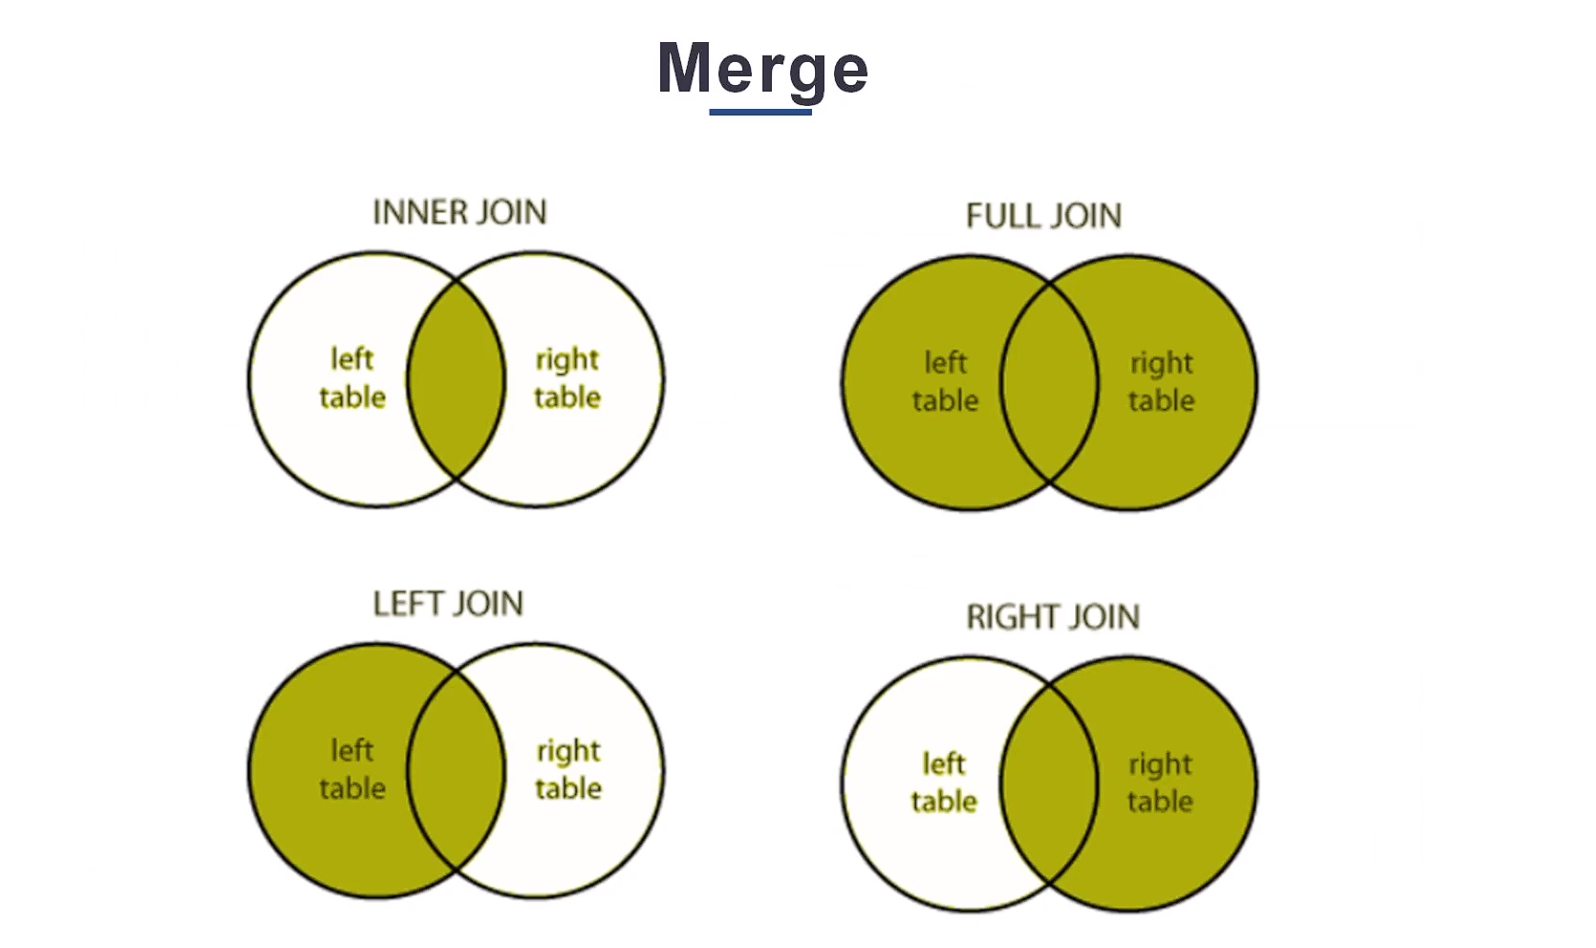

**Método Concat (de concatenação):**

In [ ]:
dt1 = {
    "Id": ["cliente_1", "cliente_2"],
    "Sexo": ["M", "F"],
}

dt2 = {
    "Id": ["cliente_3", "cliente_4"],
    "Sexo": ["F", "M"],
}

dt3 = {
    "Id": ["cliente_5", "cliente_6"],
    "Sexo": ["F", "F"],
}

d1 = pd.DataFrame(dt1)
d2 = pd.DataFrame(dt2)
d3 = pd.DataFrame(dt3)

In [ ]:
d1

,Id,Sexo
0,cliente_1,M
1,cliente_2,F


In [ ]:
d2

,Id,Sexo
0,cliente_3,F
1,cliente_4,M


In [ ]:
d3

,Id,Sexo
0,cliente_5,F
1,cliente_6,F


In [ ]:
# Podemos concatenar os valores tanto numa ótica de linha a linha
# quanto de coluna a coluna, como podemos ver a baixa nas respectivas células.
pd.concat([d1, d2, d3], axis = 0)

,Id,Sexo
0,cliente_1,M
1,cliente_2,F
0,cliente_3,F
1,cliente_4,M
0,cliente_5,F
1,cliente_6,F


In [ ]:
pd.concat([d1, d2, d3], axis = 1)

,Id,Sexo,Id,Sexo,Id,Sexo
0,cliente_1,M,cliente_3,F,cliente_5,F
1,cliente_2,F,cliente_4,M,cliente_6,F


**Método Append:**

In [ ]:
# Ele adiciona um dataframe ao outro, semelhante ao concat axis = 0.
d1.append([d2,d3])

<ipython-input-99-6230a8ecfd52>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  d1.append([d2,d3])


,Id,Sexo
0,cliente_1,M
1,cliente_2,F
0,cliente_3,F
1,cliente_4,M
0,cliente_5,F
1,cliente_6,F


In [ ]:
df_education.loc[df_education["Primary_End_Proficiency_Reading"] <= 24.75, "Nivel_Primario_de_Proficiencia_Leitura"] = "muito baixo"
df_education.loc[(df_education["Primary_End_Proficiency_Reading"] >= 24.75) & (df_education["Primary_End_Proficiency_Reading"] <= 49.5), "Nivel_Primario_de_Proficiencia_Leitura"] = "baixo"
df_education.loc[(df_education["Primary_End_Proficiency_Reading"] >= 49.5) & (df_education["Primary_End_Proficiency_Reading"] <= 74.25), "Nivel_Primario_de_Proficiencia_Leitura"] = "médio"
df_education.loc[(df_education["Primary_End_Proficiency_Reading"] >= 74.25) & (df_education["Primary_End_Proficiency_Reading"] <= 99), "Nivel_Primario_de_Proficiencia_Leitura"] = "elevado"